# Assignment 1: Source Distribution on an Airfoil

## Before we start...  
We'll take a moment to think about flow around symmetric airfoil at $0^{\circ}$ angle of attack.
* Where is the point of maximum pressure?
    * The point of maximum pressure is expected to be on the leading edge of the airfoil
* What do we call that point?
    * This is the stagnation point of the airfoil
* Will the airfoil generate any lift?
    * Since the airfoil is symmetric ** and ** is at an angle of attack of $0^{\circ}$, the airfoil will not generate any lift. Both the flow and the pressure around the airfoil will be symmetric, and without a higher pressure on the lower side of the airfoil it won't have any lift

Start the script off by importing the libraries needed and by allowing the plots to show in the Jupyter notebook.

In [1]:
import numpy
import math
from matplotlib import pyplot

%matplotlib inline

Get the strength and location data for the sources used to simulate the NACA0012 airfoil.

In [2]:
x_source = numpy.loadtxt("NACA0012_x.txt")
y_source = numpy.loadtxt("NACA0012_y.txt")
strength_source = numpy.loadtxt("NACA0012_sigma.txt")

Next, create the grid of points that the velocity will be ccalculated at using the same process shown in the lessons.

In [3]:
N = 51
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start,x_end,N)
y = numpy.linspace(y_start,y_end,N)
X, Y = numpy.meshgrid(x,y)

Get freestream velocity inthe x and y directions as well as the freestream stream function.

In [4]:
u_inf = 1.0

u_freestream = u_inf*numpy.ones((N,N),dtype=float)
v_freestream = numpy.zeros((N,N),dtype=float)

psi_freestream = u_inf*Y

Get the velocity and stream function based on the strength and location of the source using the same functions defined in the lessons.

In [5]:
def get_velocity(strength, xs, ys, X, Y):    
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """    
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    
    return psi

Since the total velocity of each point can be determined using the superposition of each individual source solution, the following loop adds the velocity solution of a new source with each iteration to the total source velocity at each point in the mesh grid.

In [6]:
u_source = 0
v_source = 0
psi_source = 0

for i in range(numpy.size(strength_source)):
    u, v = get_velocity(strength_source[i],x_source[i],y_source[i],X,Y)
    u_source += u
    v_source += v
    psi = get_stream_function(strength_source[i],x_source[i],y_source[i],X,Y)
    psi_source += psi

Superposition of the freestream velocity and stream function with those from the sources to get the total u, v, and psi at each position on the meshgrid.

In [7]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

Plot the streamlines and the position of each source.

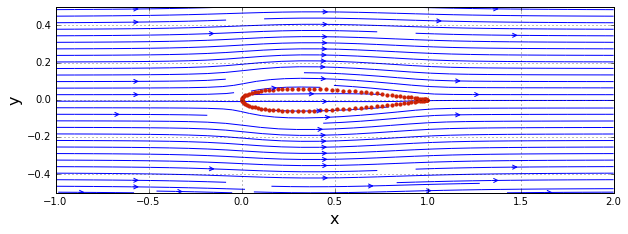

In [8]:
size = 10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=1,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter(x_source,y_source,color='#CD2305',s=10,marker='o');

## Think 
** Do the streamlines look like you expected? **

Yes, they do. I expected the streamlines to be symmetric about the airfoil; starting out with only horizontal components before reaching the airfoil, curving around it, then returning to horizontal after the airfoil.

Next, calculate the pressure coefficient and determine the maximum value, as well as the location of that value.

In [9]:
cp = 1.0 - (u**2+v**2)/u_inf**2
cpmax = numpy.amax(cp)
x_max, y_max = numpy.where(cp==cpmax)

## Questions

In [10]:
print('Maximum cp =',cpmax,'\nThe array indices are',x_max,'and',y_max)

Maximum cp = 0.471443661332 
The array indices are [25] and [16]


Determine the minimum pressure constant in order to set the best range in the contour plot.

In [11]:
numpy.amin(cp)

-0.55237082967193096

Plot the pressure coefficient about the airfoil.

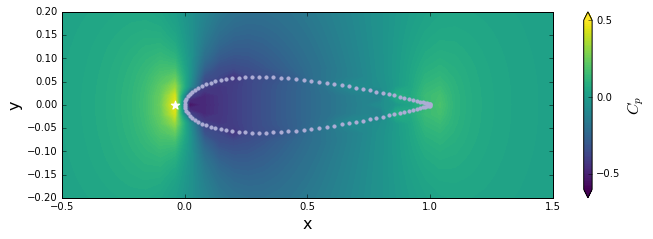

In [12]:
size = 10
pyplot.figure(figsize=(1.1*size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(-0.5,1.5)
pyplot.ylim(-0.2,0.2)
contf = pyplot.contourf(X,Y,cp,levels=numpy.linspace(-0.6,0.5,100),extend='both',cmap='viridis')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$',fontsize=16)
cbar.set_ticks([-1.0,-0.5,0.0,0.5])
pyplot.scatter(x_source,y_source,color='#ADADD5',s=10,marker='o')
pyplot.scatter(x[y_max],y[x_max],color='w',s=80,marker='*');

## Think
** What does the distribution of pressure tell you about lift generated by the airfoil? **

As expected, the pressure distribution is symmetric about the x-axis. Since it is symmetric and the maximum pressure is at the very front of the airfoil as opposed to being underneath it, there is no lift generated by the airfoil in this position.

** Does the location of the point of maximum pressure seem right to you? ** 

The location of the maximm pressure is in the correct general area, however I would expect it to be ** on ** the airfoil itself as opposed to slightly in front of it. It was determined that this error can be minimized with a more refined meshgrid.